In [1]:
import sys
sys.path.insert(1, f'../corrections/exercices')

In [2]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
PandasTools.RenderImagesInAllDataFrames(images=False)
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from IPython import display
import matplotlib.pyplot as plt 
import prince

### On commence par ouvrir le dataset

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical
0,CHEMBL2,,1,2,1976.0,0,0,Small molecule,0,True,False,PRAZOSIN,False
1,CHEMBL266459,,-2,2,1980.0,0,0,Small molecule,0,False,False,ZOMEPIRAC SODIUM,False
2,CHEMBL3,,2,1,1984.0,0,0,Small molecule,1,True,False,NICOTINE,True
3,CHEMBL4,,1,0,1990.0,0,0,Small molecule,0,True,True,OFLOXACIN,True
4,CHEMBL5,,0,2,1964.0,0,0,Small molecule,0,True,False,NALIDIXIC ACID,False

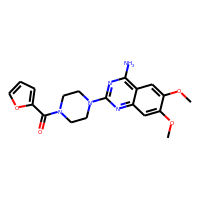
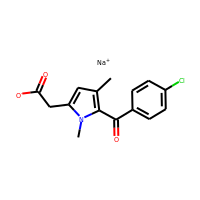
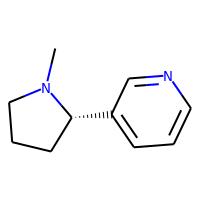
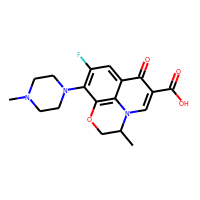
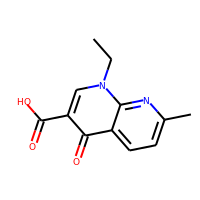

In [3]:
#Load the sdf from approved drugs download on chembl
df_meds = PandasTools.LoadSDF('./data/meds.sdf', isomericSmiles=True)
df_meds = df_meds.drop(columns=['molecule_synonyms']) #remove annoying column
df_meds.head()

### Préparation du dataset

In [4]:
#On regarde d'abord ce qu'on a, notamment les types de molécules
print(len(df_meds))
df_meds['molecule_type'].value_counts()

3371


Small molecule     3277
Protein              73
Unknown              17
Oligonucleotide       2
Oligosaccharide       2
Name: molecule_type, dtype: int64

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical
1947,CHEMBL1200644,,1,1,2001.0,0,0,Oligosaccharide,0,False,True,FONDAPARINUX SODIUM,False
2356,CHEMBL1201202,,1,1,2001.0,0,0,Oligosaccharide,0,False,True,FONDAPARINUX,False

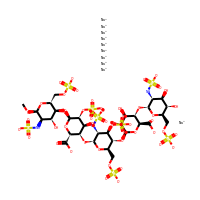
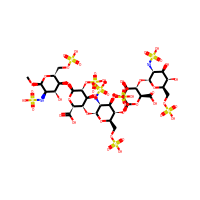

In [5]:
#On peut regarder une catégorie précise avec un filtre
df_meds[df_meds['molecule_type'] == 'Oligosaccharide']

In [6]:
#On s'intéresse uniquement au 'Small molecule'
df_meds = df_meds[df_meds['molecule_type'] == 'Small molecule']

In [7]:
from PCA import exo_frags_number

In [8]:
exo_frags_number.example() #les objects molecules n'apparaissent pas

GridBox(children=(HTML(value='<span style="font-size:medium;"\'>arguments</span>', _dom_classes=('header',)), …

In [9]:
def get_frags_number(df):
    Lnumber_mol = []
    for mol in df['ROMol']:
        Lnumber_mol.append(len(Chem.rdmolops.GetMolFrags(mol)))
    New_column = pd.DataFrame({'Frags_number': Lnumber_mol})
    New_column = New_column.set_index(df.index)
    
    return New_column

In [10]:
#plus court et rapide

def get_frags_number(df):
    New_column = pd.DataFrame({'Frags_number': [len(Chem.rdmolops.GetMolFrags(mol)) for mol in df['ROMol']]})
    New_column = New_column.set_index(df.index)
    
    return New_column

In [11]:
exo_frags_number.correction(get_frags_number) #les objects molecules n'apparaissent pas

GridBox(children=(HTML(value='<span style="font-size:medium;"\'>arguments</span>', _dom_classes=('header', '')…

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical,Frags_number
0,CHEMBL2,,1,2,1976.0,0,0,Small molecule,0,True,False,PRAZOSIN,False,1
1,CHEMBL266459,,-2,2,1980.0,0,0,Small molecule,0,False,False,ZOMEPIRAC SODIUM,False,2
2,CHEMBL3,,2,1,1984.0,0,0,Small molecule,1,True,False,NICOTINE,True,1
3,CHEMBL4,,1,0,1990.0,0,0,Small molecule,0,True,True,OFLOXACIN,True,1
4,CHEMBL5,,0,2,1964.0,0,0,Small molecule,0,True,False,NALIDIXIC ACID,False,1

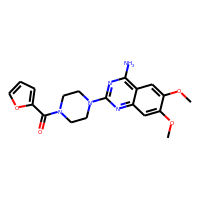
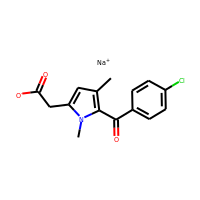
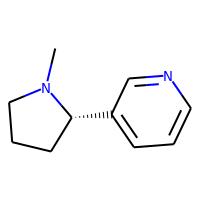
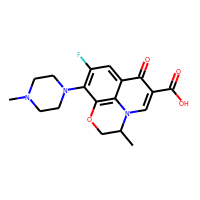
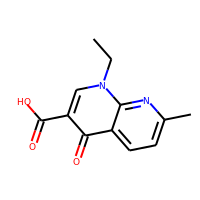

In [12]:
PandasTools.ChangeMoleculeRendering(renderer='Images')
df_meds['Frags_number'] = get_frags_number(df_meds)
df_meds.head()

In [13]:
df_meds['Frags_number'].value_counts()

1     2115
2      890
3      199
4       31
5       17
7        7
8        5
6        4
9        3
49       1
29       1
25       1
13       1
48       1
10       1
Name: Frags_number, dtype: int64

In [14]:
#On garde uniquement les molécules avec 1 seul fragment
df_meds = df_meds[df_meds['Frags_number'] == 1]
len(df_meds)

2115

In [15]:
#On peut aussi regarder les dates d'approbation des médicaments
df_meds['first_approval'].value_counts()

nan       626
1982.0    109
1996.0     47
1997.0     37
1985.0     36
1999.0     35
2015.0     32
2014.0     30
1995.0     30
1991.0     29
1992.0     29
1986.0     27
1981.0     26
2001.0     26
1984.0     26
1974.0     25
2009.0     25
2004.0     24
1959.0     24
2011.0     24
1993.0     23
1960.0     23
2012.0     23
1998.0     23
2008.0     23
2000.0     23
1979.0     22
2006.0     22
1990.0     22
1987.0     21
         ... 
1965.0     15
2005.0     14
1955.0     14
1962.0     14
1971.0     14
1975.0     13
1980.0     13
1956.0     12
1972.0     12
1969.0     12
1970.0     12
1951.0     11
1958.0     10
1954.0     10
1952.0      9
1963.0      9
1968.0      8
1946.0      8
1949.0      7
1966.0      7
2017.0      6
1948.0      6
1939.0      5
1945.0      5
1947.0      4
1943.0      3
1941.0      2
1944.0      1
1940.0      1
1942.0      1
Name: first_approval, Length: 80, dtype: int64

In [16]:
#On supprime les dates non précisées
df_meds.dropna(subset = ['first_approval'], inplace=True)
df_meds['first_approval'] = df_meds['first_approval'].astype(float)

In [17]:
#Et pour finir on garde que les médicaments sortis après les années 2000
df_meds = df_meds[df_meds['first_approval'] >= 2000]
len(df_meds)

383

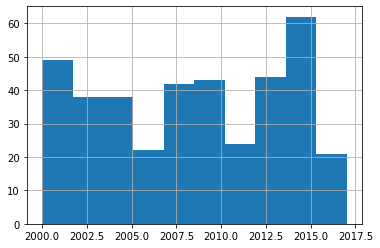

In [18]:
%matplotlib inline

#On peut regarder sous forme d'histogramme
df_meds['first_approval'].hist();


In [19]:
df_meds['natural_product'].value_counts()

0    289
1     94
Name: natural_product, dtype: int64

In [20]:
#On garde seulement les colonnes nécessaire pour l'ACP : 'natural_product', 'ROMol'
df_PCA = df_meds[['natural_product', 'ROMol']]

### Calculating our descriptors 

In [21]:
#RDKIT Descriptors 
from rdkit.Chem import Descriptors, rdMolDescriptors, Lipinski

# La liste des fonctions a utiliser pour calculer les descripteurs

# round(Descriptors.ExactMolWt(m), 1)
# round(Descriptors.MolLogP(m), 1)
# round(Descriptors.TPSA(m), 1)
# round(Descriptors.LabuteASA(m), 1)
# Descriptors.NumHAcceptors(m)
# Descriptors.NumHDonors(m)
# Lipinski.FractionCSP3(m)
# rdMolDescriptors.MQNs_(m)[7]
# rdMolDescriptors.MQNs_(m)[9]
# Lipinski.NumAromaticRings(m)
# Descriptors.NumRotatableBonds(m)

#### Liste des descripteurs : 
#### [MW, LogP, TPSA, LabuteASA, HBA, HBD, FCSP3, MQN8, MQN10, NAR, NRB]

In [22]:
from PCA import exo_df_descriptors

In [23]:
exo_df_descriptors.example()

GridBox(children=(HTML(value='<span style="font-size:medium;"\'>arguments</span>', _dom_classes=('header',)), …

In [24]:
def get_descriptors(df):
    Lmol = df['ROMol']
    Ldescriptors = []
    for m in Lmol:
        
        # Calculer les propriétés chimiques
        MW = round(Descriptors.ExactMolWt(m), 1)
        LogP = round(Descriptors.MolLogP(m), 1)
        TPSA = round(Descriptors.TPSA(m), 1)
        LabuteASA = round(Descriptors.LabuteASA(m), 1)
        HBA = Descriptors.NumHAcceptors(m)
        HBD = Descriptors.NumHDonors(m)
        FCSP3 = Lipinski.FractionCSP3(m)
        MQN8 = rdMolDescriptors.MQNs_(m)[7]
        MQN10 = rdMolDescriptors.MQNs_(m)[9]
        NAR = Lipinski.NumAromaticRings(m)
        NRB = Chem.Descriptors.NumRotatableBonds(m)
        
        Ldescriptors.append([MW, LogP, TPSA, LabuteASA, HBA, HBD, FCSP3, MQN8, MQN10, NAR, NRB])
            
    # Create pandas row for conditions results with values and information whether rule of five is violated
    prop_df = pd.DataFrame(Ldescriptors)
    prop_df.columns = ['MW', 'LogP', 'TPSA', 'LabuteASA', 'HBA', 'HBD', 'FCSP3', 'MQN8', 'MQN10', 'NAR', 'NRB']
    prop_df = prop_df.set_index(df.index)
    
    return prop_df

In [25]:
exo_df_descriptors.correction(get_descriptors)

GridBox(children=(HTML(value='<span style="font-size:medium;"\'>arguments</span>', _dom_classes=('header', '')…

In [26]:
df_PCA = df_PCA.join(get_descriptors(df_PCA))

# # same goal, using .map and lamba function
# df_PCA['MW'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.ExactMolWt(m), 1))
# df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
# df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
# df_PCA['LabuteASA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.LabuteASA(m), 1))
# df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
# df_PCA['HBD'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHDonors(m))
# df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
# df_PCA['MQN8'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[7])
# df_PCA['MQN10'] = df_PCA.ROMol.map(lambda m: rdMolDescriptors.MQNs_(m)[9])
# df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
# df_PCA['NRB'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumRotatableBonds(m))

,natural_product,ROMol,MW,LogP,TPSA,LabuteASA,HBA,HBD,FCSP3,MQN8,MQN10,NAR,NRB
58,0,,389.1,1.0,123.0,158.7,8,2,0.444444,2,4,2,5
105,1,,267.1,2.8,43.7,117.6,3,2,0.294118,0,2,2,0
143,1,,360.2,3.5,77.8,156.6,3,3,0.681818,0,4,0,8
183,0,,264.1,2.5,78.4,112.5,3,3,0.428571,2,3,1,8
202,0,,398.2,3.3,77.2,169.7,3,3,0.363636,2,2,2,7

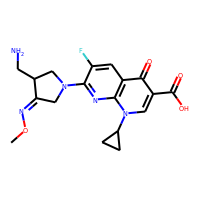
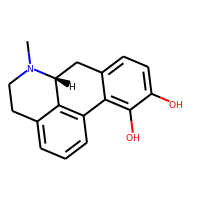
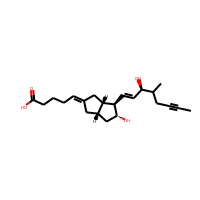
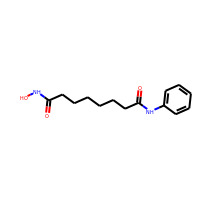
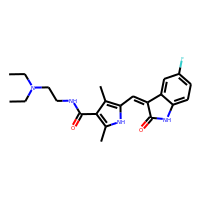

In [27]:
df_PCA.head()

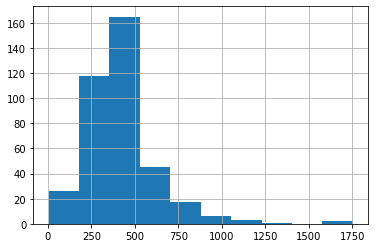

In [28]:
## Visualiser la distribution des poids moléculaire avec la méthode hist
%matplotlib inline
df_PCA.MW.hist();

In [29]:
## Garder seulement les molécules avec un poids moléculaire compris entre 200 et 700
df_PCA = df_PCA[df_PCA['MW'].between(200, 700)]
len(df_PCA)

318

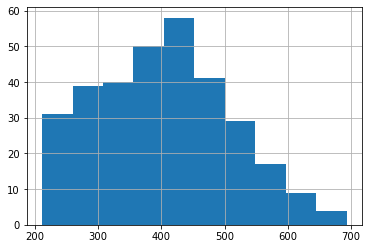

In [30]:
## On peut vérifier avec un histogramme
df_PCA.MW.hist();

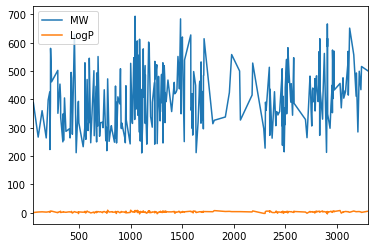

In [31]:
# On peut regarder la projection des molécules selon différentes variables avec plot
df_PCA[['MW', 'LogP']].plot();

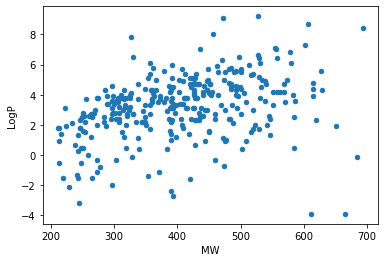

In [32]:
# Il faut préciser le type de plot
df_PCA.plot(x='MW', y='LogP', kind='scatter');

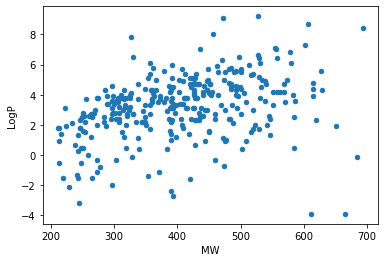

In [33]:
df_PCA.plot.scatter(x='MW', y='LogP');

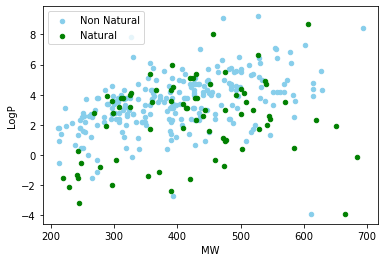

In [34]:
# On peut donner des couleurs différentes aux points selon le type de molécules
ax = df_PCA[df_PCA['natural_product'] == '0'].plot.scatter(x='MW', y='LogP', color='skyblue', label='Non Natural')
df_PCA[df_PCA['natural_product'] == '1'].plot.scatter(x='MW', y='LogP', color='Green', label='Natural', ax=ax);

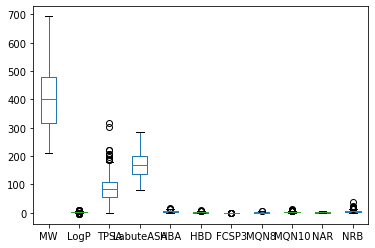

In [35]:
## On peut regarder les valeurs des différents descripteurs en utilisant des boxplots (boite à moustache)
df_PCA.plot.box();

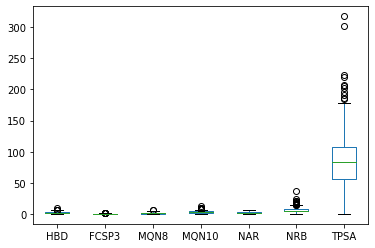

In [36]:
# On retire les valeurs trop élevées pour comparer les plus petites
x = list(range(7,13))
x.append(4)

df_PCA.iloc[:, x].plot.box();

/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


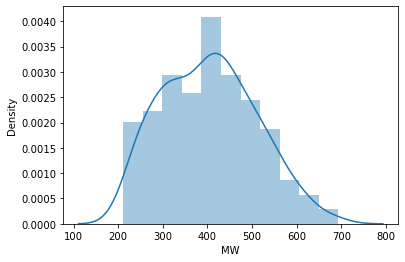

In [37]:
# La librairie seaborn peut-être plus adaptée pour les graphiques
import seaborn as sns

sns.distplot(df_PCA.MW,);

/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


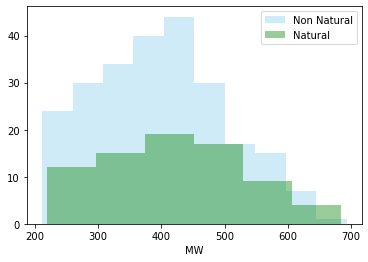

In [38]:
# On peut regarder la distribution sur le même graphique selon la catégorie
sns.distplot(df_PCA[df_PCA['natural_product'] == '0']['MW'] , color="skyblue", label="Non Natural", kde=False)
sns.distplot(df_PCA[df_PCA['natural_product'] == '1']['MW'] , color="green", label="Natural", kde=False)
plt.legend();

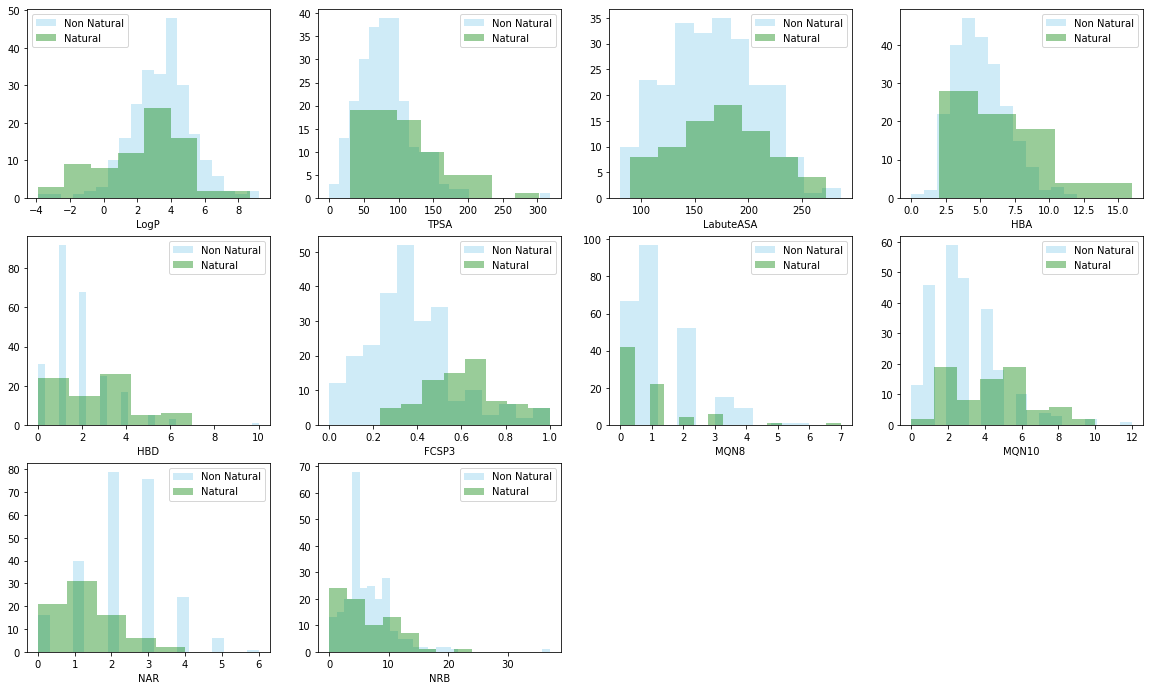

In [39]:
# Pour regarder tous les descripteurs :
plt.figure(figsize=(20, 16))

j=1
for i in df_PCA.iloc[:, 3:].columns:
    plt.subplot(4, 4, j)
    sns.distplot(df_PCA[df_PCA['natural_product'] == '0'][i] , color="skyblue", label="Non Natural", kde=False)
    sns.distplot(df_PCA[df_PCA['natural_product'] == '1'][i] , color="green", label="Natural", kde=False)
    plt.legend()
    j += 1


In [40]:
## On peut obtenir une matrice de corrélation avec la méthode corr
df_PCA.corr()

,MW,LogP,TPSA,LabuteASA,HBA,HBD,FCSP3,MQN8,MQN10,NAR,NRB
MW,1.000000,0.359521,0.452450,0.980062,0.561417,0.189812,-0.006953,0.186963,0.443247,0.376293,0.496977
LogP,0.359521,1.000000,-0.528681,0.419578,-0.361767,-0.510750,-0.106204,-0.269431,-0.321394,0.314197,0.167179
TPSA,0.452450,-0.528681,1.000000,0.385704,0.804565,0.722662,-0.029442,0.519983,0.742238,0.090495,0.309041
LabuteASA,0.980062,0.419578,0.385704,1.000000,0.509746,0.151885,0.003770,0.169105,0.388596,0.383524,0.502924
HBA,0.561417,-0.361767,0.804565,0.509746,1.000000,0.380308,-0.022404,0.310403,0.611059,0.243134,0.336820
HBD,0.189812,-0.510750,0.722662,0.151885,0.380308,1.000000,0.046633,0.513143,0.461032,-0.079675,0.199290
FCSP3,-0.006953,-0.106204,-0.029442,0.003770,-0.022404,0.046633,1.000000,-0.206889,0.211957,-0.757421,0.218829
MQN8,0.186963,-0.269431,0.519983,0.169105,0.310403,0.513143,-0.206889,1.000000,0.136114,0.116114,0.199157
MQN10,0.443247,-0.321394,0.742238,0.388596,0.611059,0.461032,0.211957,0.136114,1.000000,-0.197495,0.516191
NAR,0.376293,0.314197,0.090495,0.383524,0.243134,-0.079675,-0.757421,0.116114,-0.197495,1.000000,0.003577


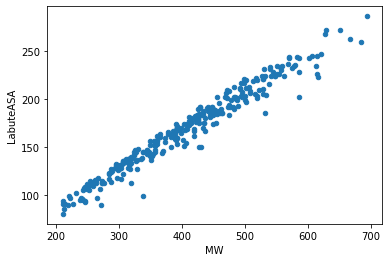

In [41]:
## Visualiser la distributions des données en fonction des deux variables les mieux correlées 
df_PCA.plot.scatter(x='MW', y='LabuteASA');

## Début de l'ACP

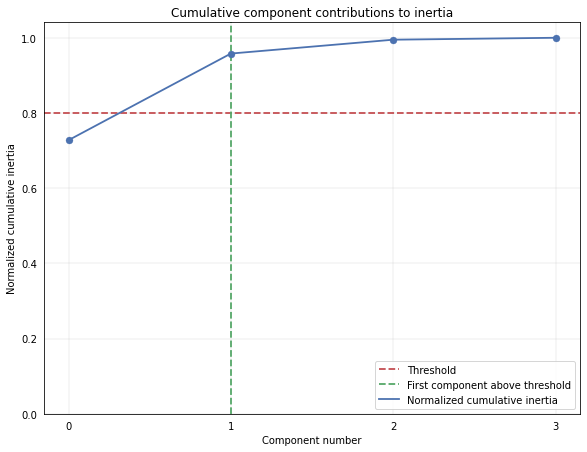

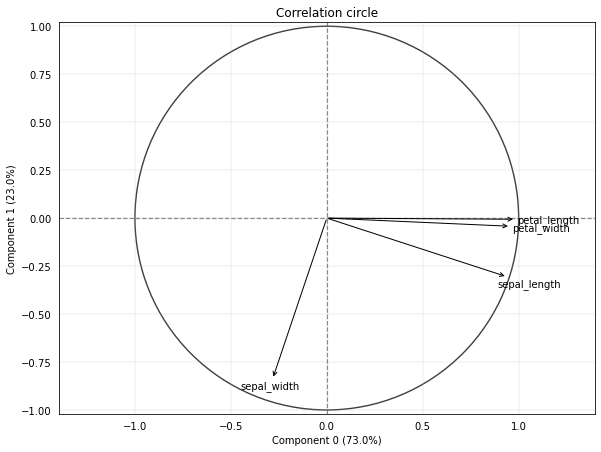

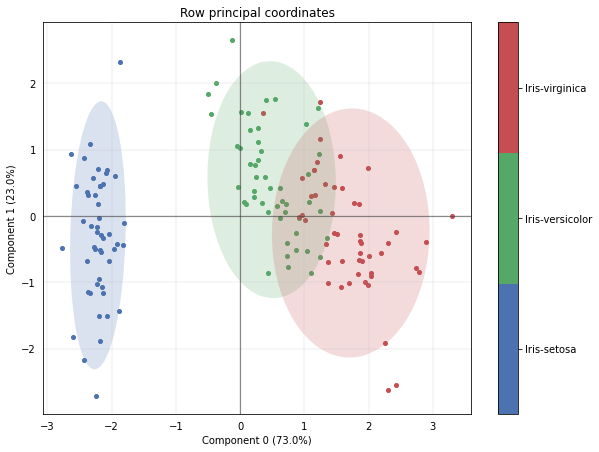

In [42]:
# Demonstration avec un exemple classique 

df = pd.read_csv('https://raw.githubusercontent.com/kormilitzin/Prince/master/examples/data/iris.csv')

pca = prince.PCA(df, n_components=4)

fig1, ax1 = pca.plot_cumulative_inertia()
fig2, ax2 = pca.plot_correlation_circle()
fig3, ax3 = pca.plot_rows(axes=[0,1], color_by='class', ellipse_fill=True)

plt.show()

### On reprend notre dataframe de médicaments

In [43]:
# On commence par faire une copie de notre dataframe car Prince va effectuer des changements dessus
df_PCA2 = df_PCA.copy()

In [44]:
# Pour faire l'ACP on passe notre dataframe à la fonction PCA du module prince
pca1 = prince.PCA(df_PCA2, n_components=4)

In [45]:
# L'attribut X nous donne les valeurs standardisées des descripteurs
pca1.X.head()

,MW,LogP,TPSA,LabuteASA,HBA,HBD,FCSP3,MQN8,MQN10,NAR,NRB
58,-0.139618,-1.047413,0.789689,-0.215856,1.045315,0.022450,0.079200,0.773937,0.387584,-0.028270,-0.316304
105,-1.296076,-0.185882,-0.968061,-1.184141,-0.907741,0.022450,-0.603683,-0.965370,-0.586738,-0.028270,-1.475112
143,-0.413566,0.149157,-0.212206,-0.265330,-0.907741,0.671445,1.157506,-0.965370,0.387584,-1.662777,0.378981
183,-1.324513,-0.329471,-0.198907,-1.304293,-0.907741,0.671445,0.007094,0.773937,-0.099577,-0.845523,0.378981
202,-0.053358,0.053432,-0.225506,0.043296,-0.907741,0.671445,-0.287883,0.773937,-0.586738,-0.028270,0.147220


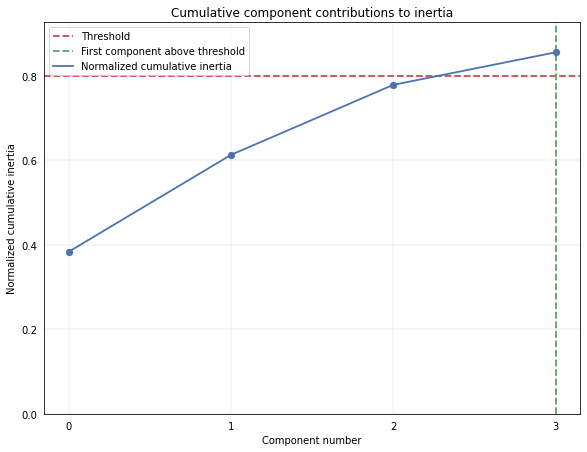

In [46]:
## Les fonctions pour représenter l'ACP sont incluses dans le package.
## Visualiser l'inertie cumulative
fig1, ax1 = pca1.plot_cumulative_inertia()
plt.show()

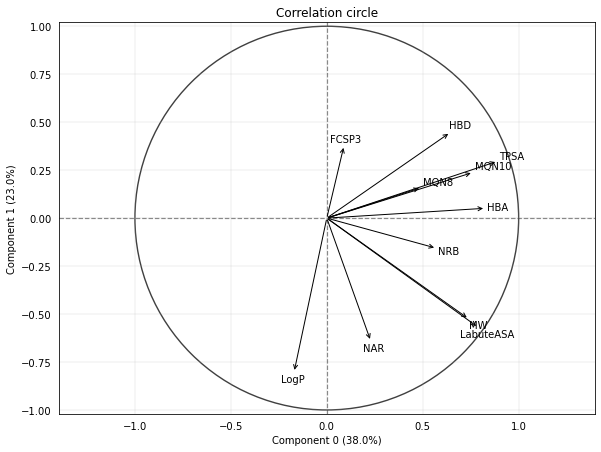

In [47]:
## Visualisation des variables en fonction des 2 composantes principales (PC1 et PC2)
## Visualiser le cercle des corrélations 
fig2, ax2 = pca1.plot_correlation_circle()
plt.show()

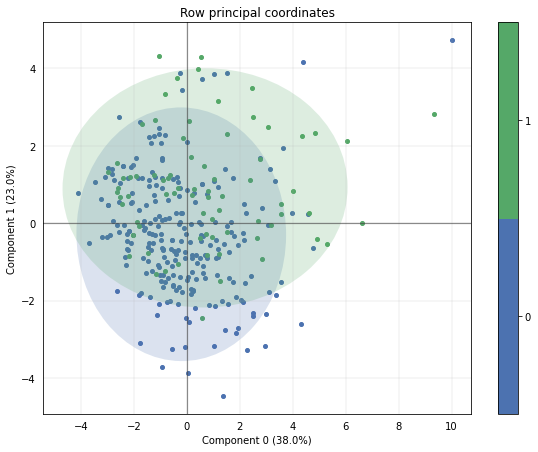

In [48]:
# Visualisation des individues en fonction des 2 composantes principales (PC1 et PC2)
fig2, ax2 = pca1.plot_rows(axes=[0,1], color_by='natural_product', ellipse_fill=True)
plt.show()

Populating the interactive namespace from numpy and matplotlib


/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


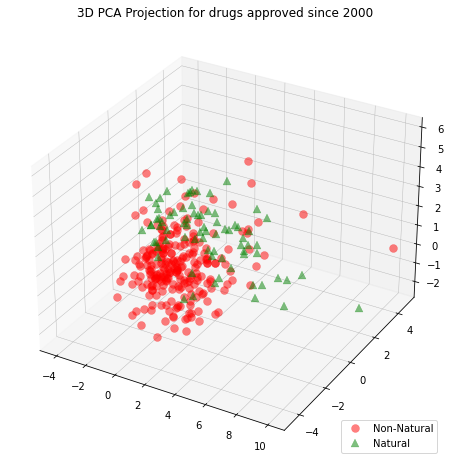

In [49]:
#Possible de représenter en 3D

#Besoin des indexes pour chaque catégorie
non_nat = pca1.categorical_columns[pca1.categorical_columns.natural_product == '0'].index
nat = pca1.categorical_columns[pca1.categorical_columns.natural_product == '1'].index


%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(pca1.row_principal_coordinates[0][non_nat], pca1.row_principal_coordinates[1][non_nat], pca1.row_principal_coordinates[2][non_nat], 'o', markersize=8, color='red', alpha=0.5, label='Non-Natural')
ax.plot(pca1.row_principal_coordinates[0][nat], pca1.row_principal_coordinates[1][nat], pca1.row_principal_coordinates[2][nat], '^', markersize=8, alpha=0.5, color='green', label='Natural')

plt.title('3D PCA Projection for drugs approved since 2000')
ax.legend(loc='lower right')

plt.show();

### Analysis

In [50]:
# Pour obtenir les corrélations des variables dans les composantes
pca1.column_correlations

,0,1,2,3
MW,0.741264,-0.576241,0.204546,-0.009606
LogP,-0.240018,-0.853566,0.289996,0.217238
TPSA,0.898263,0.305360,-0.200568,-0.110535
LabuteASA,0.696538,-0.620235,0.228614,0.029226
HBA,0.835531,0.039574,-0.108947,-0.372693
HBD,0.636779,0.465963,-0.210506,0.265421
FCSP3,0.016438,0.397196,0.831390,0.067687
MQN8,0.501024,0.171876,-0.439073,0.642263
MQN10,0.770872,0.255038,0.293179,-0.238804
NAR,0.186333,-0.691681,-0.616687,-0.145483


In [51]:
# Pour obtenir le cos2 des variables 
cos2 = np.square(pca1.column_correlations)
cos2

,0,1,2,3
MW,0.549472,0.332053,0.041839,0.000092
LogP,0.057609,0.728575,0.084097,0.047192
TPSA,0.806877,0.093245,0.040227,0.012218
LabuteASA,0.485165,0.384691,0.052264,0.000854
HBA,0.698113,0.001566,0.011869,0.138900
HBD,0.405488,0.217122,0.044313,0.070448
FCSP3,0.000270,0.157765,0.691209,0.004582
MQN8,0.251025,0.029541,0.192785,0.412502
MQN10,0.594243,0.065044,0.085954,0.057028
NAR,0.034720,0.478423,0.380303,0.021165


In [52]:
# Pour obtenir les contributions de chaque variable, il faut diviser le cos2 par la somme totale des cos2
contrib  = (cos2*100) / cos2.sum()
contrib

,0,1,2,3
MW,13.023333,13.155036,2.293000,0.010855
LogP,1.365419,28.864139,4.608980,5.551555
TPSA,19.124233,3.694108,2.204676,1.437282
LabuteASA,11.499177,15.240390,2.864357,0.100478
HBA,16.546359,0.062045,0.650506,16.339770
HBD,9.610685,8.601752,2.428562,8.287271
FCSP3,0.006404,6.250199,37.881843,0.538959
MQN8,5.949693,1.170340,10.565603,48.525329
MQN10,14.084488,2.576874,4.710721,6.708524
NAR,0.822915,18.953793,20.842588,2.489821


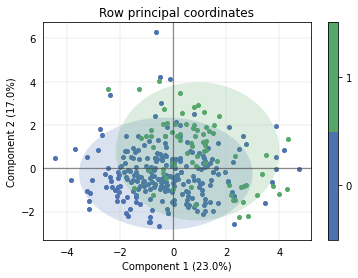

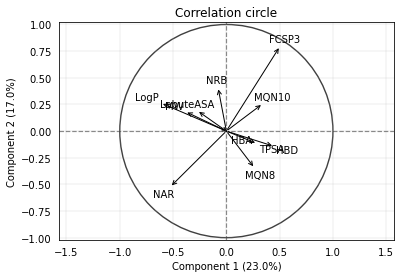

In [53]:
## On peut aussi visualiser la distributions des données en fontion des autres composantes
## Visualiser la distributions des individues et le cercle des corrélations en fonction des composantes 1 et 2
fig1, ax1 = pca1.plot_rows(axes=[1,2], color_by='natural_product', ellipse_fill=True)
fig2, ax2 =pca1.plot_correlation_circle(axes=[1,2])

plt.show()


### Essayons avec moins de descripteurs

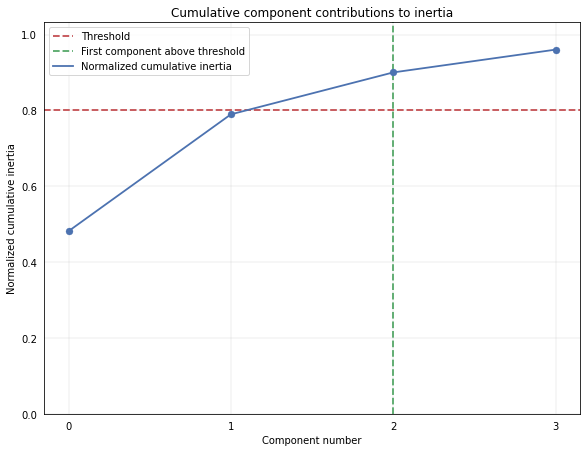

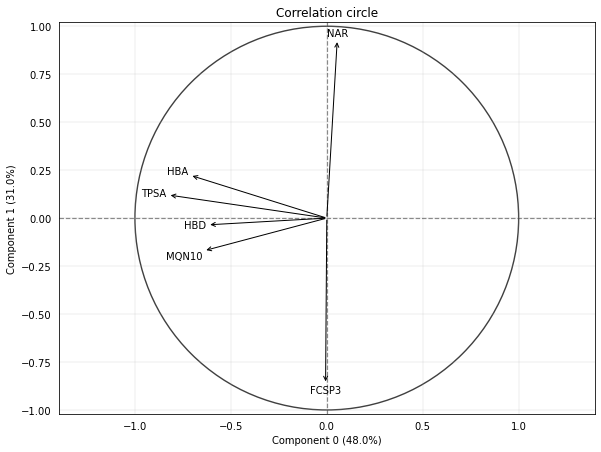

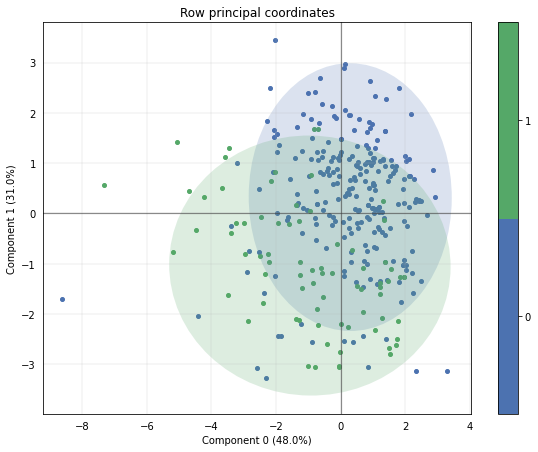

In [54]:
df_PCA_new = df_PCA[['natural_product', 'TPSA', 'HBA', 'HBD', 'FCSP3', 'MQN10', 'NAR']]
df_PCA2 = df_PCA_new.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_correlation_circle()
fig3, ax3 = pca1.plot_rows(axes=[0,1], color_by='natural_product', ellipse_fill=True)

plt.show()

### Peut-on séparer les méthodes d'administrations ?

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical,Frags_number
58,CHEMBL430,,1,0,2003.0,0,0,Small molecule,0,True,False,GEMIFLOXACIN,False,1
105,CHEMBL53,,1,1,2004.0,0,0,Small molecule,1,False,True,APOMORPHINE,False,1
143,CHEMBL494,,1,0,2004.0,0,0,Small molecule,1,False,False,ILOPROST,True,1
183,CHEMBL98,,1,2,2006.0,0,0,Small molecule,0,True,False,VORINOSTAT,False,1
202,CHEMBL535,,1,2,2006.0,0,0,Small molecule,0,True,False,SUNITINIB,False,1

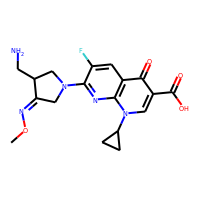
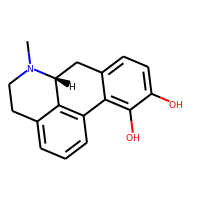
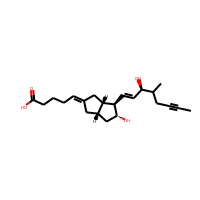
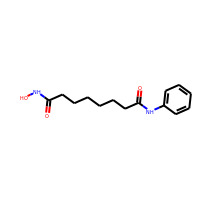
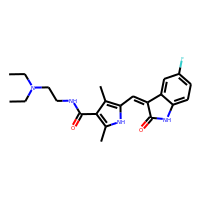

In [55]:
df_meds.head()

In [56]:
from PCA import exo_get_administration_type
exo_get_administration_type.example()

GridBox(children=(HTML(value='<span style="font-size:medium;"\'>arguments</span>', _dom_classes=('header',)), …

In [57]:
# on précise pour chaque médicament la méthode d'administration
def get_administration_type(df):
    Ladm=[]
    for a,b in df[['oral', 'parenteral', 'topical']].iterrows():
        oral = b[0]
        parenteral = b[1]
        topical = b[2]
        if oral == 'True' and parenteral == 'False' and topical == 'False' :
            Ladm.append('O')
        elif parenteral == 'True' and oral == 'False' and topical == 'False' :
            Ladm.append('P')
        elif topical == 'True' and parenteral == 'False' and oral == 'False':
            Ladm.append('T')
        else :
            Ladm.append('M')
            
    New_column = pd.DataFrame({'Administration': Ladm})
    New_column = New_column.set_index(df.index)
    return New_column

In [58]:
exo_get_administration_type.correction(get_administration_type)

GridBox(children=(HTML(value='<span style="font-size:medium;"\'>arguments</span>', _dom_classes=('header', '')…

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical,Frags_number
58,CHEMBL430,,1,0,2003.0,0,0,Small molecule,0,True,False,GEMIFLOXACIN,False,1
105,CHEMBL53,,1,1,2004.0,0,0,Small molecule,1,False,True,APOMORPHINE,False,1
143,CHEMBL494,,1,0,2004.0,0,0,Small molecule,1,False,False,ILOPROST,True,1
183,CHEMBL98,,1,2,2006.0,0,0,Small molecule,0,True,False,VORINOSTAT,False,1
202,CHEMBL535,,1,2,2006.0,0,0,Small molecule,0,True,False,SUNITINIB,False,1

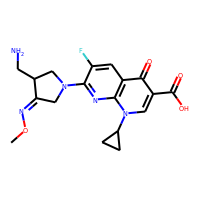
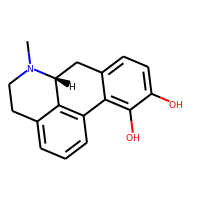
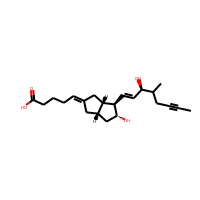
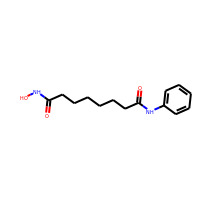
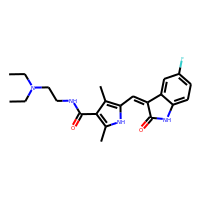

In [59]:
df_meds.head()

In [60]:
df_meds['Administration'] = get_administration_type(df_meds)

,ID,ROMol,availability_type,chirality,first_approval,first_in_class,inorganic_flag,molecule_type,natural_product,oral,parenteral,pref_name,topical,Frags_number,Administration
58,CHEMBL430,,1,0,2003.0,0,0,Small molecule,0,True,False,GEMIFLOXACIN,False,1,O
105,CHEMBL53,,1,1,2004.0,0,0,Small molecule,1,False,True,APOMORPHINE,False,1,P
143,CHEMBL494,,1,0,2004.0,0,0,Small molecule,1,False,False,ILOPROST,True,1,T
183,CHEMBL98,,1,2,2006.0,0,0,Small molecule,0,True,False,VORINOSTAT,False,1,O
202,CHEMBL535,,1,2,2006.0,0,0,Small molecule,0,True,False,SUNITINIB,False,1,O

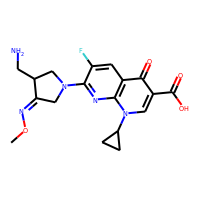
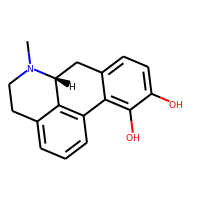
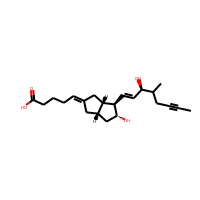
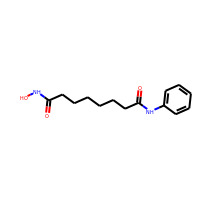
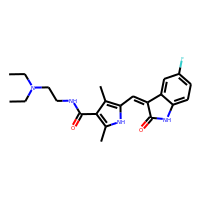

In [61]:
## Retirer toutes les molécules avec un type d'administration mixte
df_meds = df_meds[df_meds['Administration'] != 'M']

df_meds.head()

In [62]:
# On recalcule des descripteurs

df_PCA = df_meds[['ROMol', 'Administration']]

df_PCA['FCSP3'] = df_PCA.ROMol.map(lambda m: Lipinski.FractionCSP3(m))
df_PCA['NAR'] = df_PCA.ROMol.map(lambda m: Lipinski.NumAromaticRings(m))
df_PCA['Chi0'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.Chi0(m))
df_PCA['LogP'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.MolLogP(m), 1))
df_PCA['TPSA'] = df_PCA.ROMol.map(lambda m: round(Chem.Descriptors.TPSA(m), 1))
df_PCA['HBA'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.NumHAcceptors(m))
df_PCA['Bertz'] = df_PCA.ROMol.map(lambda m: Chem.Descriptors.BertzCT(m))
len(df_PCA)

/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/pierre-yvesad/anaconda3/envs/test_teachopencadd/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

351

In [63]:
df_PCA2=df_PCA.copy()
df_PCA2['Administration'].value_counts()

O    231
P     66
T     54
Name: Administration, dtype: int64

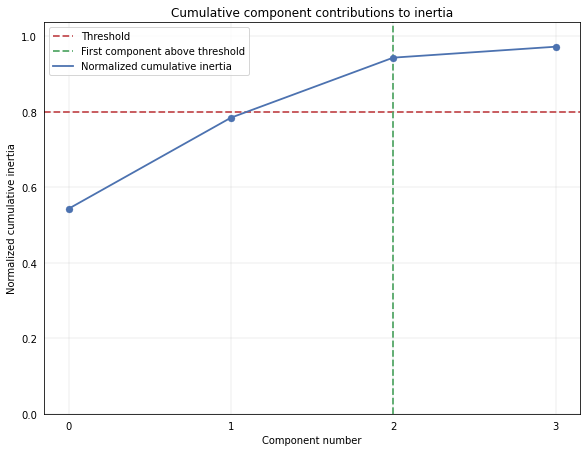

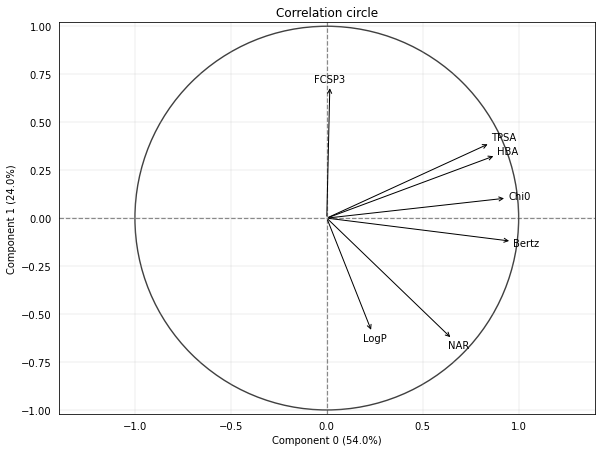

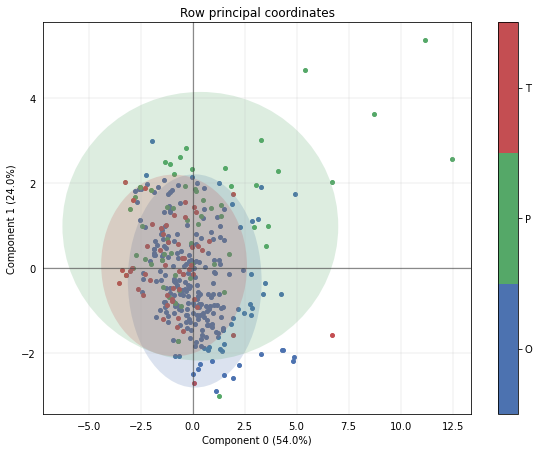

In [64]:
df_PCA2=df_PCA.copy()
pca1 = prince.PCA(df_PCA2, n_components=4)

fig1, ax1 = pca1.plot_cumulative_inertia()
fig2, ax2 = pca1.plot_correlation_circle()
fig3, ax3 = pca1.plot_rows(axes=[0,1], color_by='Administration', ellipse_fill=True)

plt.show()

In [81]:
from nbautoeval import run_yaml_quiz

In [82]:
run_yaml_quiz(f"../corrections/quiz/PCA.yaml", "theoric-quiz")

In [83]:
run_yaml_quiz(f"../corrections/quiz/PCA.yaml", "code-quiz")

In [84]:
from nbautoeval.storage import storage_clear

In [85]:
storage_clear("quiz-PCA-01")

In [70]:
storage_clear("quiz-PCA-02")